Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



                         pred
                          neutral or dissatisfied satisfied
  neutral or dissatisfied                   12980      1548
  satisfied                                  1099     10266
[1] "Accuracy : 0.8978"
[1] "Temps d'exécution :"
   user  system elapsed 
  1.517   0.001   1.528 


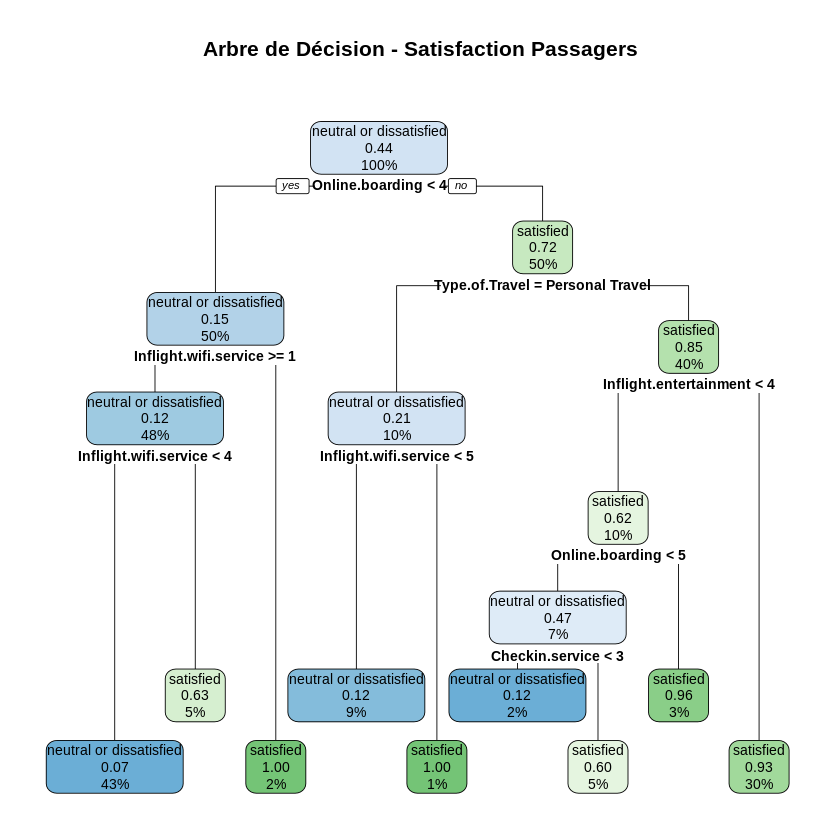

In [ ]:
install.packages("rpart.plot")
library(rpart)
library(rpart.plot)

data <- read.csv("test.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
data <- na.omit(data)
data[sapply(data, is.character)] <- lapply(data[sapply(data, is.character)], as.factor)
execution_time <- system.time({
  tree_model <- rpart(satisfaction ~ ., data = data, method = "class")
})

rpart.plot(tree_model, main = "Arbre de Décision - Satisfaction Passagers")
pred <- predict(tree_model, data, type = "class")
conf_matrix <- table(data$satisfaction, pred)
print(conf_matrix)
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)
print(paste("Accuracy :", round(accuracy, 4)))
print("Temps d'exécution :")
print(execution_time)


In [ ]:

library(randomForest)
library(mlbench)
library(e1071)
library(rpart)

data <- read.csv("test.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
head(data)
dim(data)
data <- na.omit(data)
data[sapply(data, is.character)] <- lapply(data[sapply(data, is.character)], as.factor)
execution_time <- system.time({
  RF <- randomForest(satisfaction ~ ., data)
})
RF
Pred <- predict(RF, data)
Confusion = table(data$satisfaction, Pred)
print(Confusion)
accuracy <- mean(Pred == data$satisfaction)
print("Temps d'exécution :")
print(execution_time)


,X,id,Gender,Customer.Type,Age,Type.of.Travel,Class,Flight.Distance,Inflight.wifi.service,Departure.Arrival.time.convenient,⋯,Inflight.entertainment,On.board.service,Leg.room.service,Baggage.handling,Checkin.service,Inflight.service,Cleanliness,Departure.Delay.in.Minutes,Arrival.Delay.in.Minutes,satisfaction
,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>
1,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,⋯,5,5,5,5,2,5,5,50,44,satisfied
2,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,⋯,4,4,4,4,3,4,5,0,0,satisfied
3,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,⋯,2,4,1,3,2,2,2,0,0,neutral or dissatisfied
4,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,⋯,1,1,1,1,3,1,4,0,6,satisfied
5,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,⋯,2,2,2,2,4,2,4,0,20,satisfied
6,5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,⋯,5,4,3,1,1,2,5,0,0,satisfied


[1] 25976    25


Call:
 randomForest(formula = satisfaction ~ ., data = data) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 4.26%
Confusion matrix:
                        neutral or dissatisfied satisfied class.error
neutral or dissatisfied                   14127       401  0.02760187
satisfied                                   703     10662  0.06185658

                         Pred
                          neutral or dissatisfied satisfied
  neutral or dissatisfied                   14528         0
  satisfied                                     0     11365
[1] "Temps d'exécution :"
   user  system elapsed 
 29.077   1.016  30.252 


In [ ]:
data <- read.csv("test.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
library(randomForest)
library(mlbench)
library(e1071)
library(rpart)
head(data)
dim(data)
data <- na.omit(data)
data[sapply(data, is.character)] <- lapply(data[sapply(data, is.character)], as.factor)
rf_tuned <- tune.randomForest(
  satisfaction ~ .,
  data = data,
  method = "rf",
  ntree = c(1,5,50,100)
)
rf_tuned

# Access the best tree
best_tree <- rf_tuned$best.model
best_tree

execution_time <- system.time({
RF1 <- randomForest(satisfaction ~ ., data, ntree=100)
})
execution_time

,X,id,Gender,Customer.Type,Age,Type.of.Travel,Class,Flight.Distance,Inflight.wifi.service,Departure.Arrival.time.convenient,⋯,Inflight.entertainment,On.board.service,Leg.room.service,Baggage.handling,Checkin.service,Inflight.service,Cleanliness,Departure.Delay.in.Minutes,Arrival.Delay.in.Minutes,satisfaction
,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>
1,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,⋯,5,5,5,5,2,5,5,50,44,satisfied
2,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,⋯,4,4,4,4,3,4,5,0,0,satisfied
3,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,⋯,2,4,1,3,2,2,2,0,0,neutral or dissatisfied
4,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,⋯,1,1,1,1,3,1,4,0,6,satisfied
5,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,⋯,2,2,2,2,4,2,4,0,20,satisfied
6,5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,⋯,5,4,3,1,1,2,5,0,0,satisfied


[1] 25976    25


Parameter tuning of ‘randomForest’:

- sampling method: 10-fold cross validation 

- best parameters:
 ntree
   100

- best performance: 0.04476119 



Call:
 best.randomForest(x = satisfaction ~ ., data = data, ntree = c(1,      5, 50, 100), method = "rf") 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 4

        OOB estimate of  error rate: 4.49%
Confusion matrix:
                        neutral or dissatisfied satisfied class.error
neutral or dissatisfied                   14085       443  0.03049284
satisfied                                   719     10646  0.06326441

   user  system elapsed 
  5.765   0.127   5.924 

In [ ]:
install.packages("adabag")
library(adabag)
library(mlbench)

data <- read.csv("test.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
data <- na.omit(data)
data[sapply(data, is.character)] <- lapply(data[sapply(data, is.character)], as.factor)

set.seed(123)

execution_time <- system.time({
  ada_model <- boosting(satisfaction ~ ., data = data, boos = TRUE, mfinal = 50)
})

pred <- predict(ada_model, newdata = data)

conf_matrix <- table(Observed = data$satisfaction, Predicted = pred$class)
print(conf_matrix)

accuracy <- mean(pred$class == data$satisfaction)
print(paste("Accuracy avec AdaBoost :", round(accuracy, 4)))

print("Temps d'exécution :")
print(execution_time)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘XML’, ‘rgl’, ‘rlist’, ‘gtools’, ‘doParallel’, ‘ConsRank’


Loading required package: foreach

Loading required package: doParallel

Loading required package: iterators

Loading required package: parallel



                         Predicted
Observed                  neutral or dissatisfied satisfied
  neutral or dissatisfied                   14082       446
  satisfied                                   565     10800
[1] "Accuracy avec AdaBoost : 0.961"
[1] "Temps d'exécution :"
   user  system elapsed 
124.551   0.247 125.284 
